In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

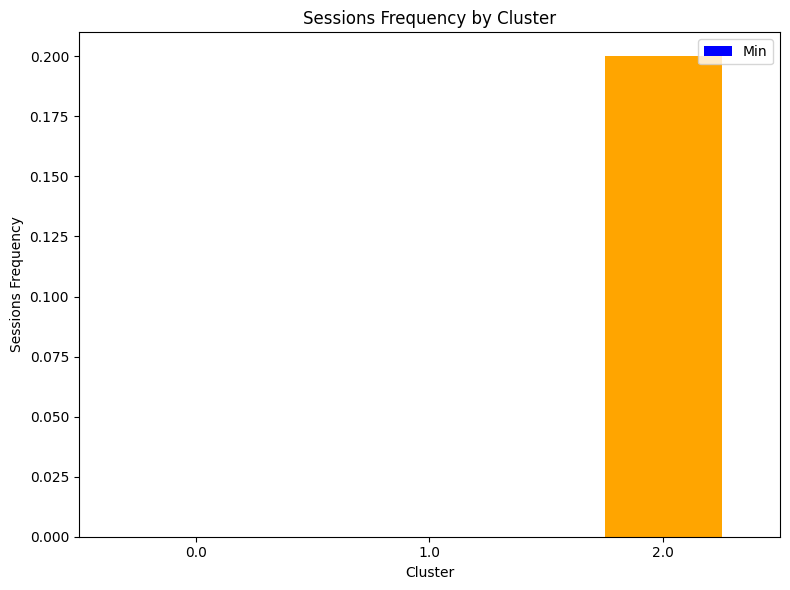

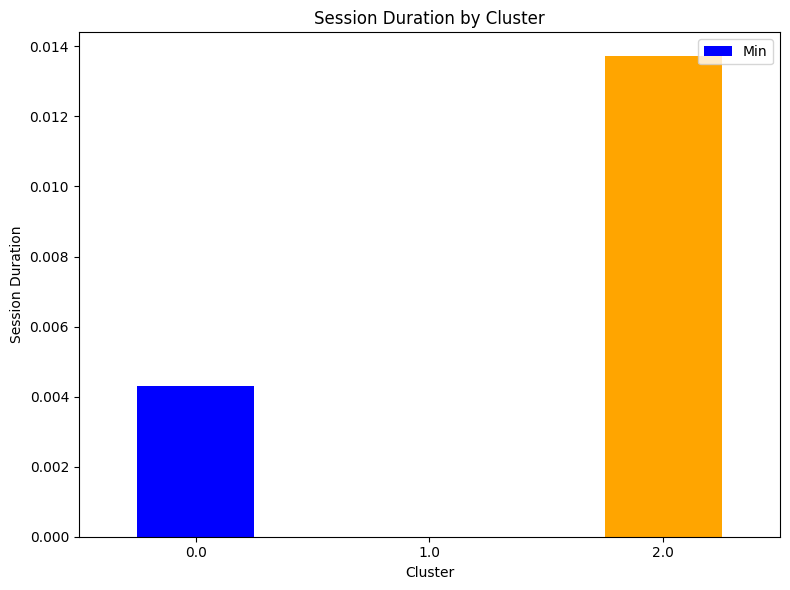

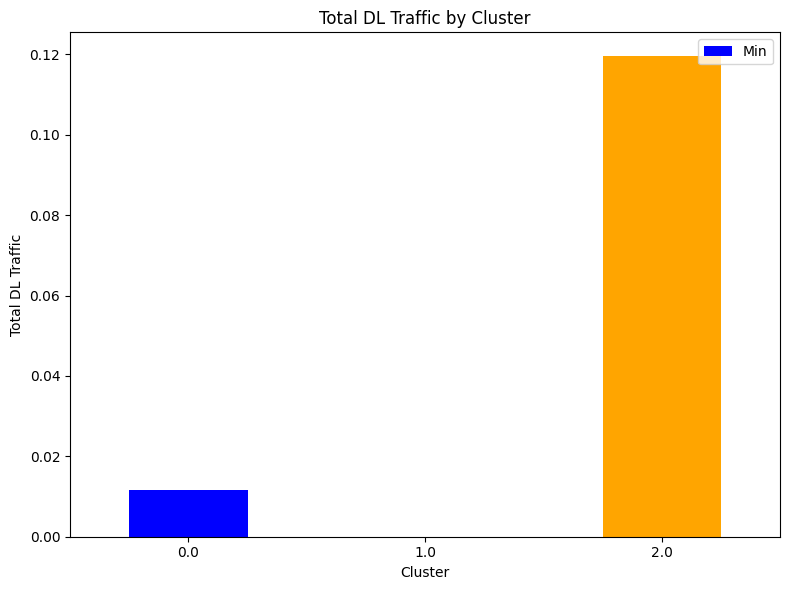

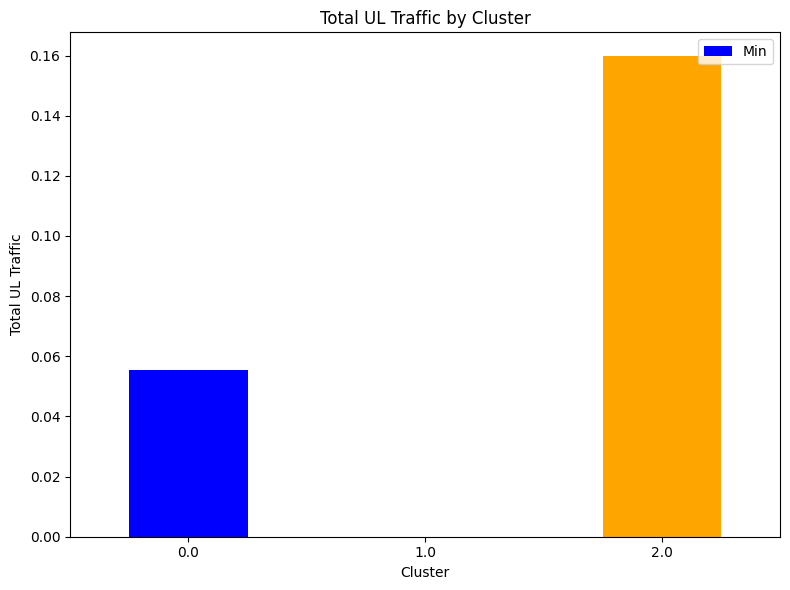

In [2]:

# Load the cluster metrics data
cluster_metrics = pd.read_csv("../results/engagement_cluster_stats.csv")

# Define the metrics to visualize
metrics = ['Sessions Frequency', 'Session Duration', 'Total DL Traffic', 'Total UL Traffic']

# Visualize metrics for each cluster
for metric in metrics:
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Convert data to numeric format if necessary
    cluster_data = pd.to_numeric(cluster_metrics.set_index('Cluster')[metric], errors='coerce')
    
    # Drop NaN values
    cluster_data = cluster_data.dropna()
    
    # Plot the data
    cluster_data.plot(kind='bar', ax=ax, color=['blue', 'green', 'orange'])
    
    ax.set_title(f'{metric} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(metric)
    ax.legend(['Min', 'Max', 'Average', 'Total'], loc='upper right')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


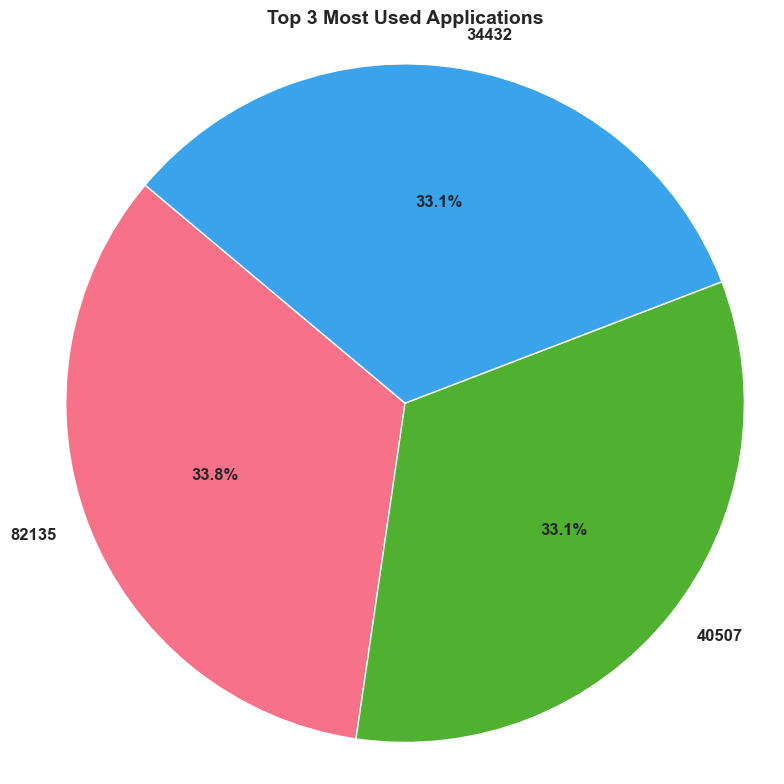

In [3]:
# Load the aggregated total traffic per application data
total_traffic_per_application = pd.read_csv("../results/total_traffic_per_application.csv")

# Calculate the total traffic for each application
total_traffic_per_application['Total Traffic'] = total_traffic_per_application.sum(axis=1)

# Sort the applications by total traffic
sorted_applications = total_traffic_per_application.sort_values(by='Total Traffic', ascending=False)

# Plot the top 3 most used applications
top_3_applications = sorted_applications.head(3)

# Set style for seaborn
sns.set(style="whitegrid")

# Set custom color palette
custom_palette = sns.color_palette("husl", len(top_3_applications))

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_3_applications['Total Traffic'], labels=top_3_applications.index, autopct='%1.1f%%', startangle=140, colors=custom_palette, textprops={'fontsize': 12, 'fontweight': 'bold', 'family': 'Arial'})
plt.title('Top 3 Most Used Applications', fontsize=14, fontweight='bold', family='Arial')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


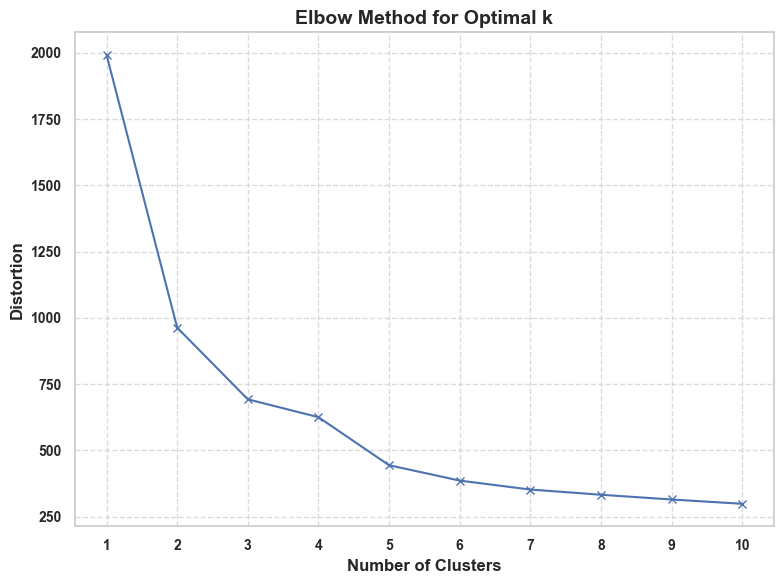

NameError: name 'KneeLocator' is not defined

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
import sys
sys.path.append('../') 
from scripts.engagment_analysis import aggregate_engagement_metrics, find_optimal_k, normalize_metrics, rename_columns

# Assuming you have the functions defined in the same Notebook or imported from a module

# Load the data
df = pd.read_csv("../results/cleaned_data.csv")

# Aggregate engagement metrics per MSISDN
engagement_metrics = aggregate_engagement_metrics(df)

# Rename columns for better readability
engagement_metrics = rename_columns(engagement_metrics)

# Normalize engagement metrics
engagement_metrics = normalize_metrics(engagement_metrics)

# Find optimal value of k
find_optimal_k(engagement_metrics[['Sessions Frequency', 'Session Duration', 'Total DL Traffic', 'Total UL Traffic']])
